<a href="https://colab.research.google.com/github/sruthib22/data690fall21/blob/main/DAA_project/%20DAA_source_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
from skimage import io, util
import heapq
import sklearn

In [2]:
# Edmonds carp algorithm
from collections import defaultdict 

class Graph_Cut: 
  
    def __init__(self,graph): 
        self.graph = graph
        self.org_graph = [i[:] for i in graph] 
        self. ROW = len(graph) 
        self.COL = len(graph[0]) 
  

    def Breadth_first(self,s, t, k, parent): 

        visited =[False]*(self.ROW) 
  

        queue=[] 
  

        queue.append(s) 
        visited[s] = True
  

        while queue: 
            u = queue.pop(0)  
            for ind, val in enumerate(self.graph[u]): 
                if visited[ind] == False and val > 0 : 
                    queue.append(ind) 
                    visited[ind] = True
                    parent[ind] = u 
  
        return True if visited[t] else False
          
    def Depth_First(self, graph,s,visited):
        visited[s]=True
        for i in range(len(graph)):
            if graph[s][i]>0 and not visited[i]:
                self.Depth_First(graph,i,visited)

    def minimum_cut(self, source, sink, s): 
        parent = [-1]*(self.ROW) 
        max_flow = 0
        while self.Breadth_first(source, sink, s, parent) : 
            path_flow = float("Inf") 
            s = sink
            while(s != source): 
                path_flow = min (path_flow, self.graph[parent[s]][s]) 
                s = parent[s] 

            max_flow += path_flow 
            v = sink 
            while(v != source): 
                u = parent[v] 
                self.graph[u][v] -= path_flow 
                self.graph[v][u] += path_flow 
                v = parent[v] 
  
        visited=len(self.graph)*[False]
        self.Depth_First(self.graph,s,visited)
        left_image = []
        right_image = []
        
        for i in range(self.ROW): 
            for j in range(self.COL): 
                if self.graph[i][j] == 0 and\
                self.org_graph[i][j] > 0 and visited[i]:
                    left_image .append(i)
                    right_image.append(j)
                    
        return left_image,right_image

In [12]:
# using ford fulkerson algorithm
  
from collections import defaultdict 
  
class Graph:
  def __init__(self,graph) :
    self.visitedCount = 1
    self.graph = graph
    self.Row = len(graph)
          
  def minimum_cut(self,source,sink,s):
         x=len(self.graph)
         visited=0
         visited_arr=False*x
         maximum_flow=0
         while(True):
            flow=self.depth(self.graph,visited,source,sink,float('inf'))
            self.visitedCount += 1   
            maximum_flow+= flow
            if flow<=1e-7:
                for i in range(0,x):
                    if (visited[i]==self.visitedCount-1):
                         visited_arr[i]=True
                return visited_arr         
  def depth(self,graph,visited,node,sink,flow):
           if (node==sink): 
            return flow
           next = graph[node]
           visited[node] = self.visitedCount
           for i in range(len(next)):
            if visited[i] != self.visitedCount and next[i]>0.5:
                if (next[i]<flow):
                    flow =next[i]
                flow =self.depth(graph,visited,i,sink,flow)
                if (flow>0.5):
                    graph[node][i]=graph[node][i]-flow
                    graph[i][node]=graph[i][node]+flow
                    return flow
            return 0

In [3]:
def rand_patch(texture, patchLength):
    h, w, _ = texture.shape
    i = np.random.randint(h - patchLength)
    j = np.random.randint(w - patchLength)

    return texture[i:i+patchLength, j:j+patchLength]

In [4]:
def Best_random_patch(texture, patchLength, overlap, res, y, x):
    
    h, w, _ = texture.shape
    errors = np.zeros((h - patchLength, w - patchLength))

    for i in range(h - patchLength):
        for j in range(w - patchLength):
            patch = texture[i:i+patchLength, j:j+patchLength]
            e = overlap_diff(patch, patchLength, overlap, res, y, x)
            errors[i, j] = e

    i, j = np.unravel_index(np.argmin(errors), errors.shape)
    return texture[i:i+patchLength, j:j+patchLength]

In [5]:
def overlap_diff(patch, patchLength, overlap, res, y, x):
    error = 0

    if x > 0:
        left = patch[:, :overlap] - res[y:y+patchLength, x:x+overlap]
        error += np.sum(left**2)

    if y > 0:
        up   = patch[:overlap, :] - res[y:y+overlap, x:x+patchLength]
        error += np.sum(up**2)

    if x > 0 and y > 0:
        corner = patch[:overlap, :overlap] - res[y:y+overlap, x:x+overlap]
        error -= np.sum(corner**2)

    return error

In [6]:
import matplotlib.pyplot as plt2
def minimumcut_patch(patch, patchLength, overlap, res, y, x,texture):

    patch_copy = patch.copy()
    res_copy = res.copy()
    
    
    if y > 0:
        patch_right = res_copy[x:x+patchLength,y:y+overlap]
        patch_left = patch_copy[:,:overlap]
      
        totalNodes = (len(patch_right) * len(patch_right[0]))+2
        
        matrix = []
        for i in range(0,(len(patch_right) * len(patch_right[0]))+2):
            rows = []
            for j in range(0,(len(patch_right) * len(patch_right[0]))+2):
                rows.append(0)
            matrix.append(rows)

        for i in range(1,len(patch_right)+1):
            matrix[0][i] = float('inf')
        for i in range(25*(overlap-1)+1,totalNodes-1):
            matrix[i][totalNodes-1] = float('inf')



        cols = len(patch_right)
        for i in range(1,patchLength+1):
            prev = i
            for j in range(0,overlap):
                if(j+1<overlap):
                    
                    matrix[prev][prev+cols] = getAvg(abs(patch_left[i-1][j] - patch_right[i-1][j]) + abs(patch_left[i-1][j+1] - patch_right[i-1][j+1]))

                if(i < patchLength):
                   
                    matrix[prev][prev+1] = getAvg(abs(patch_left[i-1][j] - patch_right[i-1][j]) + abs(patch_left[i][j] - patch_right[i][j]))
                prev = prev+cols


        graph = matrix

        g = Graph_Cut(matrix) 

        source = 0; sink = 101
        s = 0
        left_pixels ,right_pixels = g.minimum_cut(source, sink, s)

        for i in range(0,len(left_pixels)):
            print(left_pixels[i],right_pixels[i]) 
        
        pixelsFromLeft = set()
        pixelsFromRight = set()
       
        
        for i in range(0,len(left_pixels)):
            if right_pixels[i] != left_pixels[i]+1:
                
                row = left_pixels[i] % 25
                if(row == 0):
                    row = 25
                ctr = 0
                for j in range(row,left_pixels[i]+1):
                    pixelsFromLeft.add(j)
                    ctr +=1
              
                j = right_pixels[i]
                while(ctr<overlap):
                    pixelsFromRight.add(j)
                    j = j+25
                    ctr+=1
    
        print("left",pixelsFromLeft)
        print("Right",pixelsFromRight)

        counter = 1
        
        for j in range(0,overlap):
            for i in range(0,patchLength):
                
                if counter in pixelsFromLeft:
                    patch[i][j] = patch_left[i][j]
                    counter+=1
                
        
        minCutMatrix = []
        for i in range(0,patchLength):
            colorsRow = []
            for j in range(0,overlap):
                print("MAPPING",i+1+(j*patchLength))
                if i+1+(j*patchLength) in pixelsFromLeft:
                    colorsRow.append(1)
                else:
                    colorsRow.append(2)
            minCutMatrix.append(colorsRow)
                    
                    
        fig, ax = plt.subplots()
        ax.matshow(minCutMatrix, cmap='ocean')
        plt.show()
        
        
        
    
    if x > 0 :
        matrix = []
        patch_up = res_copy[((x)):(x+overlap),y:y+patchLength]
        patch_bottom = patch_copy[:overlap,:]
        
        print("Patch Up",patch_up)
        print("Patch bottom",patch_bottom)
        
        for i in range(0,(len(patch_up) * len(patch_up[0]))+2):
            rows = []
            for j in range(0,(len(patch_up) * len(patch_up[0]))+2):
                rows.append(0)
            matrix.append(rows)
    

        for i in range(1,len(patch_up)+1):
            matrix[0][i] = float('inf')
        for i in range(97,101):
            matrix[i][101] = float('inf')



        cols = len(patch_up)
        for i in range(1,overlap+1):
            prev = i
            for j in range(0,patchLength):
                if(j+1<patchLength): 
                    if(getAvg(patch_up[i-1][j])  == getAvg(patch_bottom[i-1][j]) and getAvg(patch_up[i-1][j+1]) == getAvg(patch_bottom[i-1][j+1])):
                        print("ohhh..... is it you again!!")
                    matrix[prev][prev+cols] = getAvg(abs(patch_up[i-1][j] - patch_bottom[i-1][j]) + abs(patch_up[i-1][j+1] - patch_bottom[i-1][j+1]))

                if(i < overlap):        
                    if(getAvg(patch_up[i-1][j])  == getAvg(patch_bottom[i-1][j]) and getAvg(patch_up[i][j]) == getAvg(patch_bottom[i][j])):
                        print("ohh.... you again!!!")
                    matrix[prev][prev+1] = getAvg(abs(patch_up[i-1][j] - patch_bottom[i-1][j]) + abs(patch_up[i][j] - patch_bottom[i][j]))
                prev = prev+cols



        graph = matrix

        g = Graph_Cut(matrix) 

        source = 0; sink = 101
        s = 0
        left_pixels ,right_pixels = g.minimum_cut(source, sink, s)

        for i in range(0,len(left_pixels)):
            print(left_pixels[i],right_pixels[i]) 
        
        pixelsFromUp = set()
        pixelsFromBottom = set()
       
        
        for i in range(0,len(left_pixels)):
            #horizontal cut
            if right_pixels[i] != left_pixels[i]+1:
                
                row = left_pixels[i] % 4
                if(row == 0):
                    row = 4
                column =(int) (min(left_pixels[i] /4,right_pixels[i]/4))
                ctr = 0
                for j in range((column*4)+1,left_pixels[i]+1):
                    pixelsFromUp.add(j)
                    ctr +=1
                j = right_pixels[i]
                while(ctr<overlap):
                    pixelsFromBottom.add(j)
                    j = j+4
                    ctr+=1
    
        counter = 1
        
        for j in range(0,patchLength):
            for i in range(0,overlap):
                
                if counter in pixelsFromUp:
                    patch[i][j] = patch_up[i][j]
                    counter+=1
                
        
        minCutMatrix = []
        for i in range(0,overlap):
            colorsRow = []
            for j in range(0,patchLength):
                print("MAPPING",j+1+(i*patchLength))
                if j+1+(i*patchLength) in pixelsFromUp:
                    colorsRow.append(1)
                else:
                    colorsRow.append(2)
            minCutMatrix.append(colorsRow)
                    
                    
        fig, ax = plt.subplots()
        ax.matshow(minCutMatrix, cmap='ocean')
        plt.show()
        
    return patch

In [7]:
successfulPatch = []

In [8]:
def image_quilt(texture, patchLength, numPatches, mode="cut", sequence=True):
    texture = util.img_as_float(texture)
    
    overlap = patchLength 
    numPatchesHigh, numPatchesWide = numPatches
    
    h = (numPatchesHigh * patchLength) - (numPatchesHigh - 1) * overlap
    w = (numPatchesWide * patchLength) - (numPatchesWide - 1) * overlap
    
    
    res = np.zeros((h, w, texture.shape[2]))

    for i in range(numPatchesHigh):
        for j in range(numPatchesWide):
            x = i * (patchLength - overlap)
            y = j * (patchLength - overlap)
            print("X",x)
            print("Y",y)
            if i == 0 and j == 0 or mode == "random":
                patch = rand_patch(texture, patchLength)
                successfulPatch = patch
            elif mode == "best":
                patch = Best_random_patch(texture, patchLength, overlap, res, y, x)
            elif mode == "cut":
                patch = Best_random_patch(texture, patchLength, overlap, res, y, x)
                patch = minimumcut_patch(patch, patchLength, overlap, res, y, x,texture)
            
            res[y:y+patchLength,x:x+patchLength] = patch

            if sequence:
                io.imshow(res)
                io.show()
      
    return res

In [9]:
def getAvg(pixelArray):
    return (sum(pixelArray)/3)

X 0
Y 0


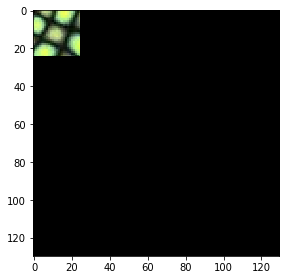

X 0
Y 21
1 26
2 27
3 28
6 31
7 32
8 33
9 34
15 40
16 41
17 42
18 43
19 44
20 45
21 46
22 47
23 48
24 49
31 56
32 33
32 57
39 64
40 41
40 65
50 75
54 79
55 80
56 57
56 81
60 85
61 86
62 87
63 88
64 65
64 89
left {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64}
Right {26, 27, 28, 31, 32, 33, 34, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 56, 57, 58, 59, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 81, 82, 83, 84, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}
MAPPING 1
MAPPING 26
MAPPING 51
MAPPING 76
MAPPING 2
MAPPING 27
MAPPING 52
MAPPING 77
MAPPING 3
MAPPING 28
MAPPING 53
MAPPING 78
MAPPING 4
MAPPING 29
MAPPING 54
MAPPING 79
MAPPING 5
MAPPING 30
MAPPING 55
MAPPING 80
MAPPING 6
MAPPING 31
MAPPING 56
MAPPING 81
MAPPING 7
MAPPING 32
MAPPING 57
MAPPING 82
MAPPING 8
MAPPING 33
MAPPING 

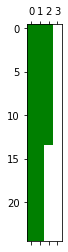

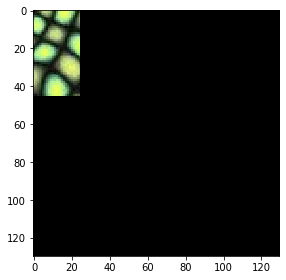

X 0
Y 42
1 26
2 27
5 30
6 31
7 32
8 33
9 34
10 35
11 36
12 37
13 38
14 39
15 40
16 41
17 42
28 53
29 30
29 54
43 68
69 94
70 95
71 96
72 97
73 98
74 99
75 100
left {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75}
Right {26, 27, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 51, 52, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 76, 77, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92}
MAPPING 1
MAPPING 26
MAPPING 51
MAPPING 76
MAPPING 2
MAPPING 27
MAPPING 52
MAPPING 77
MAPPING 3
MAPPING 28
MAPPING 53
MAPPING 78
MAPPING 4
MAPPING 29
MAPPING 54
MAPPING 79
MAPPING 5
MAPPING 30
MAPPING 55
MAPPING 80
MAPPING 6
MAPPING 31
MAPPING 56
MAPPING 81
MAPPING 7
MAPPING 32
MAPPING 57
MAPPING 82
MAPPING 8
MAPPING 33
MAPPING 58
MAPPING 83
MAPPING 9
MAP

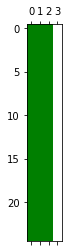

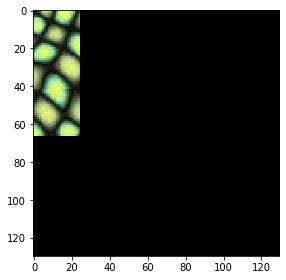

X 0
Y 63
13 38
14 39
15 40
16 41
17 42
18 43
19 44
20 45
21 46
22 47
23 48
24 49
25 50
35 60
36 61
37 62
38 63
39 40
39 64
51 76
52 77
53 78
54 79
55 80
56 81
57 82
58 83
59 84
60 61
60 85
left {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60}
Right {38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100}
MAPPING 1
MAPPING 26
MAPPING 51
MAPPING 76
MAPPING 2
MAPPING 27
MAPPING 52
MAPPING 77
MAPPING 3
MAPPING 28
MAPPING 53
MAPPING 78
MAPPING 4
MAPPING 29
MAPPING 54
MAPPING 79
MAPPING 5
MAPPING 30
MAPPING 55
MAPPING 80
MAPPING 6
MAPPING 31
MAPPING 56
MAPPING 81
MAPPING 7
MAPPING 32
MAPPING 57
MAPPING 82
MAPPING 8
MAPPING 33
MAPPING 58
MAPPING 83
MAPPING 9
MAPPING 34
MAPPING 59
MAPPING 84
MAPPING 10
MAPPING 35
M

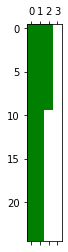

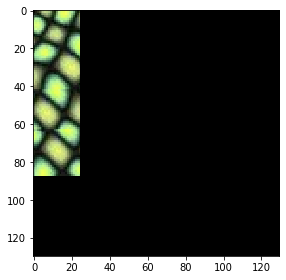

X 0
Y 84
1 26
2 27
3 28
4 29
5 30
6 31
7 32
8 33
48 73
49 74
50 75
59 84
60 85
61 86
62 87
63 88
64 89
65 90
66 91
67 92
68 93
69 94
70 95
71 96
72 97
73 74
73 98
left {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73}
Right {26, 27, 28, 29, 30, 31, 32, 33, 51, 52, 53, 54, 55, 56, 57, 58, 76, 77, 78, 79, 80, 81, 82, 83}
MAPPING 1
MAPPING 26
MAPPING 51
MAPPING 76
MAPPING 2
MAPPING 27
MAPPING 52
MAPPING 77
MAPPING 3
MAPPING 28
MAPPING 53
MAPPING 78
MAPPING 4
MAPPING 29
MAPPING 54
MAPPING 79
MAPPING 5
MAPPING 30
MAPPING 55
MAPPING 80
MAPPING 6
MAPPING 31
MAPPING 56
MAPPING 81
MAPPING 7
MAPPING 32
MAPPING 57
MAPPING 82
MAPPING 8
MAPPING 33
MAPPING 58
MAPPING 83
MAPPING 9
MAPPING 34
MAPPING 59
MAPPING 84
MAPPING 10
MAPPING 35
MAPPING 60
MAPPING 85
MAPPING 11
MAP

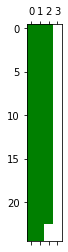

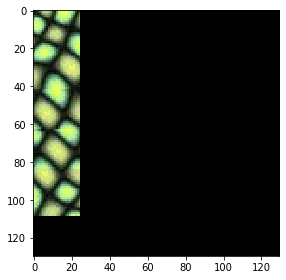

X 0
Y 105
6 31
7 32
8 33
9 34
10 35
11 36
12 37
13 38
14 39
15 40
16 41
17 42
18 43
19 44
20 45
21 46
22 47
29 54
30 55
31 56
32 57
33 58
34 59
35 36
35 60
48 73
51 76
52 77
53 78
54 55
54 79
74 99
75 100
left {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75}
Right {31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97}
MAPPING 1
MAPPING 26
MAPPING 51
MAPPING 76
MAPPING 2
MAPPING 27
MAPPING 52
MAPPING 77
MAPPING 3
MAPPING 28
MAPPING 53
MAPPING 78
MAPPING 4
MAPPING 29
MAPPING 54
MAPPING 79
MAPPING 5
MAPPING 30
MAPPING 55
MAPPING 80
MAPPING 6
MAPPING 31
MAPPING 56
MAPPING 81
MAPPING 7
MAPPING 32
MAPPING 

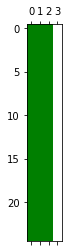

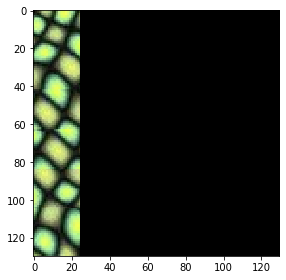

X 21
Y 0
Patch Up [[[0.18039216 0.34901961 0.17254902]
  [0.51764706 0.72156863 0.47843137]
  [0.6745098  0.88235294 0.56078431]
  [0.78039216 0.96862745 0.57647059]
  [0.83529412 0.98823529 0.52156863]
  [0.85490196 0.98039216 0.45098039]
  [0.88627451 1.         0.42352941]
  [0.85490196 1.         0.45490196]
  [0.7254902  0.95294118 0.50980392]
  [0.63921569 0.89803922 0.55686275]
  [0.61176471 0.83529412 0.61960784]
  [0.40392157 0.58039216 0.45098039]
  [0.2745098  0.39607843 0.33333333]
  [0.11764706 0.19607843 0.16078431]
  [0.01960784 0.05098039 0.        ]
  [0.06666667 0.08235294 0.02745098]
  [0.10196078 0.1254902  0.08627451]
  [0.0627451  0.10196078 0.07058824]
  [0.0627451  0.10980392 0.10980392]
  [0.12941176 0.21176471 0.17647059]
  [0.34901961 0.47843137 0.35686275]
  [0.50980392 0.68235294 0.44313725]
  [0.68627451 0.91372549 0.52156863]
  [0.74117647 0.97254902 0.47058824]
  [0.79215686 0.98039216 0.4       ]]

 [[0.37254902 0.56470588 0.34901961]
  [0.6745098  0.90

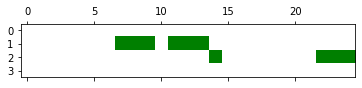

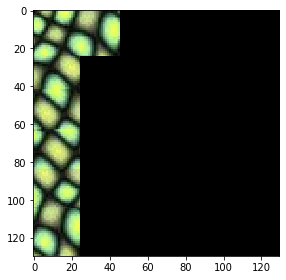

X 21
Y 21
2 27
3 28
4 29
5 30
7 32
8 33
9 34
10 35
11 36
12 37
13 38
14 39
15 40
16 41
20 45
21 46
22 47
23 48
24 49
25 50
27 52
29 54
30 55
33 58
34 59
35 36
35 60
45 70
46 47
46 71
51 76
52 77
53 78
54 79
55 80
56 81
57 82
58 83
59 60
59 84
67 92
68 93
69 94
70 71
70 95
left {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70}
Right {27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 95, 96, 97, 98, 99, 100}
MAPPING 1
MAPPING 26
MAPPING 51
MAPPING 76
MAPPING 2
MAPPING 27
MAPPING 52
MAPPING 77
MAPPING 3
MAPPING 28
MAPPING 53
MAPPING 78
MAPPING 4
MAPPING 29
MAPPING 54
MAPPING 79
MAPPING 5
MAPPING 30
MAPPING 5

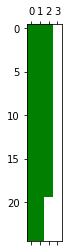

Patch Up [[[0.60392157 0.79607843 0.61960784]
  [0.63921569 0.85882353 0.56470588]
  [0.73333333 0.94901961 0.55294118]
  [0.82352941 0.99215686 0.52941176]
  [0.83921569 1.         0.49019608]
  [0.80392157 0.99215686 0.4627451 ]
  [0.77254902 0.98431373 0.50588235]
  [0.72156863 0.96078431 0.58823529]
  [0.66666667 0.90588235 0.64313725]
  [0.4        0.58431373 0.44313725]
  [0.16470588 0.30196078 0.22352941]
  [0.04313725 0.1254902  0.05882353]
  [0.21960784 0.26666667 0.18039216]
  [0.34901961 0.38431373 0.2627451 ]
  [0.44313725 0.46666667 0.31764706]
  [0.44313725 0.47058824 0.30980392]
  [0.38039216 0.40784314 0.2745098 ]
  [0.23529412 0.29019608 0.2       ]
  [0.11372549 0.18823529 0.11372549]
  [0.03529412 0.12941176 0.04313725]
  [0.10980392 0.20784314 0.12156863]
  [0.17647059 0.2745098  0.19215686]
  [0.16470588 0.24705882 0.18823529]
  [0.11764706 0.16862745 0.13333333]
  [0.01568627 0.05098039 0.03137255]]

 [[0.38823529 0.54901961 0.43137255]
  [0.49019608 0.69803922 0.

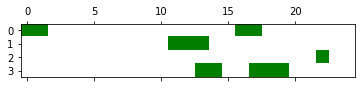

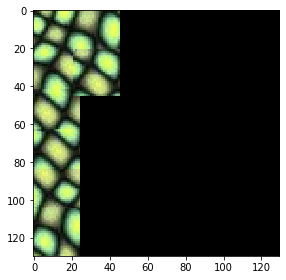

X 21
Y 42
1 26
2 27
3 28
4 29
5 30
6 31
7 32
8 33
9 34
10 35
11 36
12 37
13 38
14 39
15 40
16 41
17 42
18 43
19 44
45 70
71 96
72 97
73 98
74 99
75 100
left {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75}
Right {26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94}
MAPPING 1
MAPPING 26
MAPPING 51
MAPPING 76
MAPPING 2
MAPPING 27
MAPPING 52
MAPPING 77
MAPPING 3
MAPPING 28
MAPPING 53
MAPPING 78
MAPPING 4
MAPPING 29
MAPPING 54
MAPPING 79
MAPPING 5
MAPPING 30
MAPPING 55
MAPPING 80
MAPPING 6
MAPPING 31
MAPPING 56
MAPPING 81
MAPPING 7
MAPPING 32
MAPPING 57
MAPPING 82
MAPPING 8
MAPPI

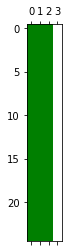

Patch Up [[[0.09411765 0.16470588 0.07843137]
  [0.22745098 0.27843137 0.20784314]
  [0.30196078 0.34509804 0.28235294]
  [0.30196078 0.33333333 0.28235294]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.05882353 0.1254902  0.0627451 ]
  [0.10980392 0.15686275 0.

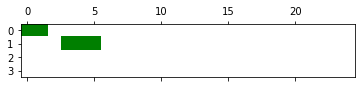

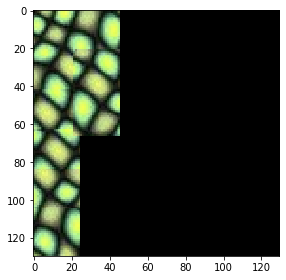

X 21
Y 63
10 35
11 36
12 37
13 38
14 39
15 40
16 41
17 42
18 43
19 44
20 45
21 46
22 47
23 48
24 49
25 50
34 59
35 36
35 60
51 76
52 77
53 78
54 79
55 80
56 81
57 82
58 83
59 60
59 84
left {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59}
Right {35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100}
MAPPING 1
MAPPING 26
MAPPING 51
MAPPING 76
MAPPING 2
MAPPING 27
MAPPING 52
MAPPING 77
MAPPING 3
MAPPING 28
MAPPING 53
MAPPING 78
MAPPING 4
MAPPING 29
MAPPING 54
MAPPING 79
MAPPING 5
MAPPING 30
MAPPING 55
MAPPING 80
MAPPING 6
MAPPING 31
MAPPING 56
MAPPING 81
MAPPING 7
MAPPING 32
MAPPING 57
MAPPING 82
MAPPING 8
MAPPING 33
MAPPING 58
MAPPING 83
MAPPING 9
MAPPING 34
MAPPING 59
MAPPING

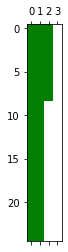

Patch Up [[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0

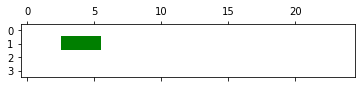

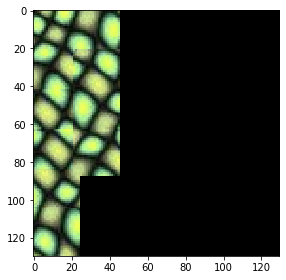

X 21
Y 84
1 26
2 27
3 28
4 29
5 30
6 31
16 41
17 42
18 43
19 44
20 45
21 46
22 47
23 48
24 49
25 50
32 57
40 65
41 42
41 66
58 83
59 84
60 85
61 86
62 87
63 88
64 89
65 66
65 90
left {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65}
Right {26, 27, 28, 29, 30, 31, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100}
MAPPING 1
MAPPING 26
MAPPING 51
MAPPING 76
MAPPING 2
MAPPING 27
MAPPING 52
MAPPING 77
MAPPING 3
MAPPING 28
MAPPING 53
MAPPING 78
MAPPING 4
MAPPING 29
MAPPING 54
MAPPING 79
MAPPING 5
MAPPING 30
MAPPING 55
MAPPING 80
MAPPING 6
MAPPING 31
MAPPING 56
MAPPING 81
MAPPING 7
MAPPING 32
MAPPING 57
MAPPING 82
MAPPING 8
MAPPING 33
MAPPING 58
MAPPING 83
MAPPING 9
MAPPING 34


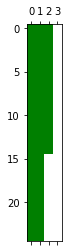

Patch Up [[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0

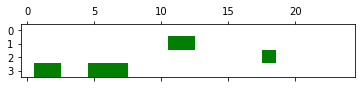

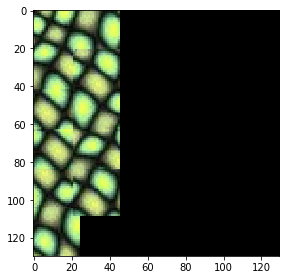

X 21
Y 105
1 26
2 27
3 28
4 29
5 30
6 31
7 32
8 33
9 34
10 35
11 36
12 37
13 38
14 39
15 40
16 41
17 42
18 43
19 44
20 45
21 46
47 72
73 98
74 99
75 100
left {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75}
Right {26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96}
MAPPING 1
MAPPING 26
MAPPING 51
MAPPING 76
MAPPING 2
MAPPING 27
MAPPING 52
MAPPING 77
MAPPING 3
MAPPING 28
MAPPING 53
MAPPING 78
MAPPING 4
MAPPING 29
MAPPING 54
MAPPING 79
MAPPING 5
MAPPING 30
MAPPING 55
MAPPING 80
MAPPING 6
MAPPING 31
MAPPING 56
MAPPING 81
MAPPING 7
MAPPING 32
MAPPING 57
M

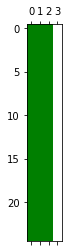

Patch Up [[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0

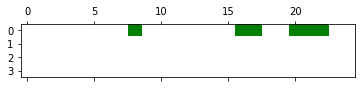

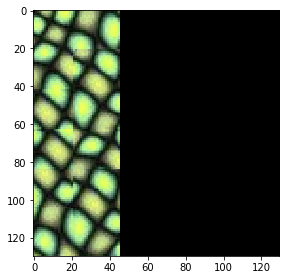

X 42
Y 0
Patch Up [[[0.17254902 0.21176471 0.16862745]
  [0.16470588 0.18823529 0.13333333]
  [0.17254902 0.19607843 0.14117647]
  [0.08235294 0.11372549 0.0627451 ]
  [0.0627451  0.12941176 0.06666667]
  [0.26666667 0.39215686 0.30196078]
  [0.46666667 0.64313725 0.48235294]
  [0.60784314 0.83137255 0.55294118]
  [0.72941176 0.96862745 0.56470588]
  [0.75686275 0.98039216 0.45882353]
  [0.83137255 1.         0.42745098]
  [0.88235294 1.         0.38039216]
  [0.89411765 0.99607843 0.39607843]
  [0.87058824 1.         0.48627451]
  [0.79215686 0.96470588 0.52941176]
  [0.67843137 0.89411765 0.56470588]
  [0.57254902 0.79215686 0.54509804]
  [0.40392157 0.58039216 0.41176471]
  [0.21960784 0.34901961 0.23529412]
  [0.09803922 0.16862745 0.10588235]
  [0.03921569 0.08627451 0.03921569]
  [0.09411765 0.16470588 0.07843137]
  [0.05490196 0.10588235 0.06666667]
  [0.07843137 0.14509804 0.10588235]
  [0.09019608 0.16862745 0.12156863]]

 [[0.07058824 0.11372549 0.09803922]
  [0.10980392 0.12

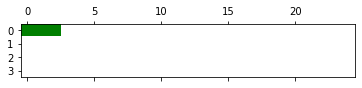

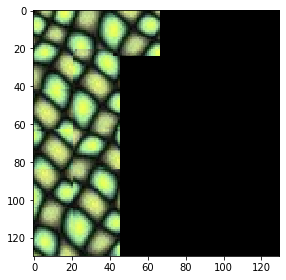

X 42
Y 21
1 26
2 27
3 28
4 29
12 37
13 38
14 39
15 40
16 41
17 42
20 45
21 46
22 47
23 48
24 49
25 50
35 60
36 61
37 38
37 62
43 68
46 47
46 71
55 80
56 81
57 82
58 83
59 84
60 85
61 62
61 86
69 94
70 95
71 72
71 96
left {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71}
Right {26, 27, 28, 29, 37, 38, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 62, 63, 64, 65, 66, 67, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 87, 88, 89, 90, 91, 92, 95, 96, 97, 98, 99, 100}
MAPPING 1
MAPPING 26
MAPPING 51
MAPPING 76
MAPPING 2
MAPPING 27
MAPPING 52
MAPPING 77
MAPPING 3
MAPPING 28
MAPPING 53
MAPPING 78
MAPPING 4
MAPPING 29
MAPPING 54
MAPPING 79
MAPPING 5
MAPPING 30
MAPPING 55
MAPPING 80
MAPPING 6
MAPPING 31
MAPPING 56
MAPPING 81
MAPPING 7
MAPPING 32
MAPPING 57
MAPPING 82
MA

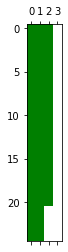

Patch Up [[[0.09411765 0.16470588 0.07843137]
  [0.05490196 0.10588235 0.06666667]
  [0.07843137 0.14509804 0.10588235]
  [0.09019608 0.16862745 0.12156863]
  [0.01176471 0.09803922 0.04705882]
  [0.06666667 0.15686275 0.09411765]
  [0.0627451  0.14509804 0.07058824]
  [0.18431373 0.25490196 0.16078431]
  [0.34509804 0.40784314 0.26666667]
  [0.55294118 0.60392157 0.39607843]
  [0.63137255 0.68235294 0.41176471]
  [0.85098039 0.89803922 0.56862745]
  [0.83529412 0.89019608 0.50980392]
  [0.81568627 0.8745098  0.47843137]
  [0.85098039 0.91764706 0.50980392]
  [0.80784314 0.87843137 0.48627451]
  [0.79215686 0.85490196 0.50980392]
  [0.72941176 0.78039216 0.50980392]
  [0.55294118 0.59215686 0.39607843]
  [0.36862745 0.40784314 0.2745098 ]
  [0.16470588 0.2        0.1254902 ]
  [0.0627451  0.10196078 0.07058824]
  [0.04313725 0.07843137 0.06666667]
  [0.03529412 0.0627451  0.03529412]
  [0.02352941 0.05490196 0.01176471]]

 [[0.05882353 0.1254902  0.0627451 ]
  [0.10980392 0.21568627 0.

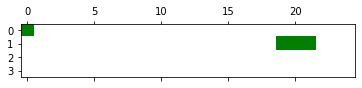

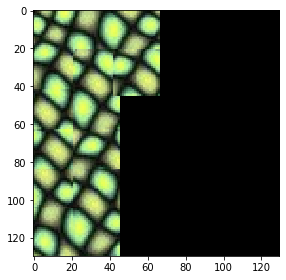

X 42
Y 42
2 27
3 28
4 29
14 39
17 42
18 43
19 44
20 45
21 46
22 47
23 48
24 49
25 50
26 51
27 28
27 52
32 57
33 58
34 59
35 60
36 61
37 62
43 68
44 45
44 69
55 80
56 57
56 81
63 88
64 89
65 90
66 91
67 92
68 93
69 70
69 94
left {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69}
Right {27, 28, 29, 39, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 64, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 89, 92, 93, 94, 95, 96, 97, 98, 99, 100}
MAPPING 1
MAPPING 26
MAPPING 51
MAPPING 76
MAPPING 2
MAPPING 27
MAPPING 52
MAPPING 77
MAPPING 3
MAPPING 28
MAPPING 53
MAPPING 78
MAPPING 4
MAPPING 29
MAPPING 54
MAPPING 79
MAPPING 5
MAPPING 30
MAPPING 55
MAPPING 80
MAPPING 6
MAPPING 31
MAPPING 56
MAPPING 81
MAPPING 7
MAPPING 32
MAPPING 57
MAPPING 82
MAPPING 8
MAPPING 33
MAPPING 58
MAPPING

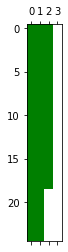

Patch Up [[[0.60392157 0.67058824 0.45882353]
  [0.4627451  0.52156863 0.36078431]
  [0.34117647 0.39215686 0.28235294]
  [0.17647059 0.22745098 0.14901961]
  [0.04705882 0.09411765 0.03921569]
  [0.10980392 0.2        0.1372549 ]
  [0.20784314 0.36470588 0.27058824]
  [0.28627451 0.48235294 0.36862745]
  [0.34509804 0.56862745 0.43137255]
  [0.3372549  0.56470588 0.41568627]
  [0.37254902 0.58431373 0.45098039]
  [0.18039216 0.36078431 0.24705882]
  [0.08627451 0.21568627 0.14117647]
  [0.05098039 0.14117647 0.07058824]
  [0.16078431 0.21176471 0.14117647]
  [0.3254902  0.36078431 0.25490196]
  [0.56078431 0.60392157 0.43921569]
  [0.65490196 0.70588235 0.49411765]
  [0.65882353 0.7254902  0.45882353]
  [0.78823529 0.85882353 0.56862745]
  [0.7372549  0.80784314 0.50980392]
  [0.58823529 0.65490196 0.38823529]
  [0.51372549 0.56078431 0.37254902]
  [0.30196078 0.34509804 0.21960784]
  [0.1254902  0.17647059 0.10588235]]

 [[0.60392157 0.67058824 0.45882353]
  [0.43529412 0.50196078 0.

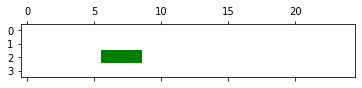

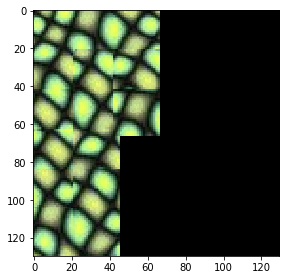

X 42
Y 63
1 26
2 27
3 28
4 29
5 30
6 31
7 32
8 33
9 34
10 35
11 36
12 37
25 50
38 63
39 64
40 65
41 66
42 67
43 68
44 69
45 70
46 71
47 72
48 73
49 74
50 75
left {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}
Right {26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 100}
MAPPING 1
MAPPING 26
MAPPING 51
MAPPING 76
MAPPING 2
MAPPING 27
MAPPING 52
MAPPING 77
MAPPING 3
MAPPING 28
MAPPING 53
MAPPING 78
MAPPING 4
MAPPING 29
MAPPING 54
MAPPING 79
MAPPING 5
MAPPING 30
MAPPING 55
MAPPING 80
MAPPING 6
MAPPING 31
MAPPING 56
MAPPING 81
MAPPING 7
MAPPING 32
MAPPING 57
MAPPING 82
MAPPING 8
MAPPING 33
MAPPING 58
MAPPING 83
MAPPING 9
MAPPING 34
MAPPING 59
MAPPING 84
MAPPING 10
MAPPING 35
MAPPING 60
MAPPING 85
MAPPING 11
MAPPING 36
MAPPING 61
MAPPING 86
MAPPING

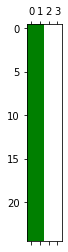

Patch Up [[[0.30196078 0.45490196 0.34901961]
  [0.23529412 0.39215686 0.29803922]
  [0.15294118 0.2745098  0.20392157]
  [0.0627451  0.11372549 0.0745098 ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.11764706 0.21176471 0.15686275]
  [0.10588235 0.19607843 0.

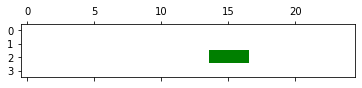

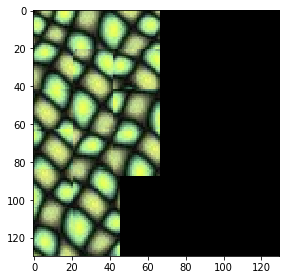

X 42
Y 84
6 31
13 38
14 39
15 40
16 41
17 42
18 43
19 44
20 45
21 46
22 47
23 48
24 49
25 50
35 60
36 61
37 62
38 39
38 63
51 76
52 77
53 78
54 79
55 80
56 81
57 82
58 83
59 84
60 61
60 85
left {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60}
Right {31, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 56, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 81, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100}
MAPPING 1
MAPPING 26
MAPPING 51
MAPPING 76
MAPPING 2
MAPPING 27
MAPPING 52
MAPPING 77
MAPPING 3
MAPPING 28
MAPPING 53
MAPPING 78
MAPPING 4
MAPPING 29
MAPPING 54
MAPPING 79
MAPPING 5
MAPPING 30
MAPPING 55
MAPPING 80
MAPPING 6
MAPPING 31
MAPPING 56
MAPPING 81
MAPPING 7
MAPPING 32
MAPPING 57
MAPPING 82
MAPPING 8
MAPPING 33
MAPPING 58
MAPPING 83
MAPPING 9
MAPPING 34
MAPPING 59
MAPPING 84
MAPPING 10


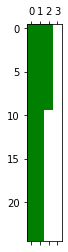

Patch Up [[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0

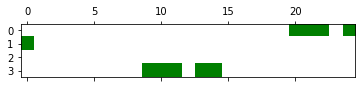

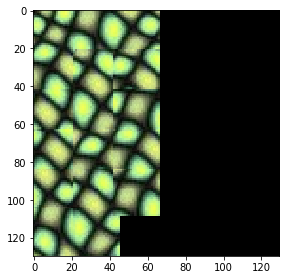

X 42
Y 105
1 26
2 27
3 28
4 29
5 30
6 31
7 32
8 33
9 34
10 35
11 36
12 37
13 38
14 39
15 40
16 41
42 67
68 93
69 94
70 95
71 96
72 97
73 98
74 99
75 100
left {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75}
Right {26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91}
MAPPING 1
MAPPING 26
MAPPING 51
MAPPING 76
MAPPING 2
MAPPING 27
MAPPING 52
MAPPING 77
MAPPING 3
MAPPING 28
MAPPING 53
MAPPING 78
MAPPING 4
MAPPING 29
MAPPING 54
MAPPING 79
MAPPING 5
MAPPING 30
MAPPING 55
MAPPING 80
MAPPING 6
MAPPING 31
MAPPING 56
MAPPING 81
MAPPING 7
MAPPING 32
MAPPING 57
MAPPING 82
MAPPING 8
MAPPING 33
MAPPING 58
MAPPING 83
MAPPING

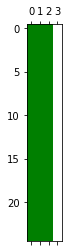

Patch Up [[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0

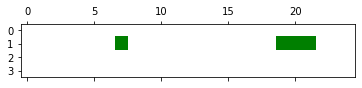

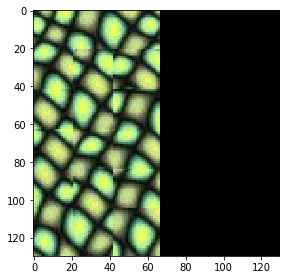

X 63
Y 0
Patch Up [[[0.62352941 0.81176471 0.51372549]
  [0.61176471 0.81568627 0.55686275]
  [0.36862745 0.55686275 0.36078431]
  [0.24705882 0.38431373 0.26666667]
  [0.08627451 0.18039216 0.11764706]
  [0.01568627 0.08235294 0.05882353]
  [0.07058824 0.11372549 0.09803922]
  [0.10980392 0.12941176 0.10588235]
  [0.11372549 0.1254902  0.09803922]
  [0.08235294 0.10196078 0.0745098 ]
  [0.06666667 0.11764706 0.07843137]
  [0.25882353 0.36470588 0.29803922]
  [0.39607843 0.55294118 0.40784314]
  [0.61176471 0.81960784 0.55294118]
  [0.69803922 0.9372549  0.53333333]
  [0.77254902 1.         0.45882353]
  [0.81568627 1.         0.37254902]
  [0.90196078 1.         0.35686275]
  [0.91372549 1.         0.35294118]
  [0.89019608 1.         0.42745098]
  [0.83921569 1.         0.49803922]
  [0.56078431 0.63921569 0.4       ]
  [0.53333333 0.60784314 0.39215686]
  [0.4        0.46666667 0.29411765]
  [0.28235294 0.34901961 0.21568627]]

 [[0.71372549 0.91764706 0.48627451]
  [0.72156863 0.95

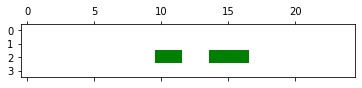

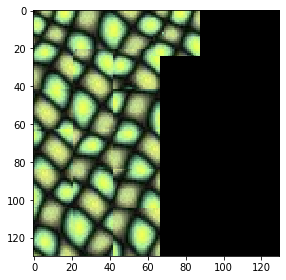

X 63
Y 21
1 26
4 29
5 30
6 31
7 32
8 33
9 34
13 38
14 39
19 44
20 45
21 46
22 47
23 48
24 49
25 50
27 52
28 53
29 30
29 54
38 63
39 64
43 68
44 45
44 69
60 85
61 86
62 63
62 87
65 90
66 91
67 68
67 92
left {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67}
Right {26, 29, 30, 31, 32, 33, 34, 38, 39, 44, 45, 46, 47, 48, 49, 50, 51, 54, 55, 56, 57, 58, 59, 63, 64, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 84, 88, 89, 94, 95, 96, 97, 98, 99, 100}
MAPPING 1
MAPPING 26
MAPPING 51
MAPPING 76
MAPPING 2
MAPPING 27
MAPPING 52
MAPPING 77
MAPPING 3
MAPPING 28
MAPPING 53
MAPPING 78
MAPPING 4
MAPPING 29
MAPPING 54
MAPPING 79
MAPPING 5
MAPPING 30
MAPPING 55
MAPPING 80
MAPPING 6
MAPPING 31
MAPPING 56
MAPPING 81
MAPPING 7
MAPPING 32
MAPPING 57
MAPPING 82
MAPPING 8
MAPPING 33
MAPPING 58
M

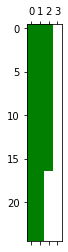

Patch Up [[[0.56078431 0.63921569 0.4       ]
  [0.53333333 0.60784314 0.39215686]
  [0.4        0.46666667 0.29411765]
  [0.28235294 0.34901961 0.21568627]
  [0.15294118 0.22352941 0.1372549 ]
  [0.07058824 0.14117647 0.08627451]
  [0.02745098 0.07843137 0.03921569]
  [0.01176471 0.05882353 0.01960784]
  [0.02352941 0.06666667 0.00392157]
  [0.16862745 0.22352941 0.13333333]
  [0.26666667 0.34117647 0.22352941]
  [0.33333333 0.41176471 0.26666667]
  [0.56470588 0.63921569 0.45882353]
  [0.71372549 0.79215686 0.56078431]
  [0.73333333 0.79607843 0.50980392]
  [0.78823529 0.84705882 0.52156863]
  [0.84705882 0.91764706 0.58039216]
  [0.76078431 0.83529412 0.5254902 ]
  [0.74117647 0.81176471 0.58431373]
  [0.52156863 0.58823529 0.42352941]
  [0.37647059 0.43137255 0.34117647]
  [0.38823529 0.42745098 0.32156863]
  [0.12941176 0.20392157 0.11764706]
  [0.03137255 0.16470588 0.05882353]
  [0.28627451 0.45882353 0.31764706]]

 [[0.70588235 0.78039216 0.4627451 ]
  [0.69803922 0.77647059 0.

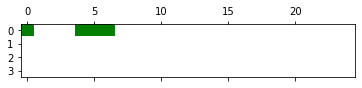

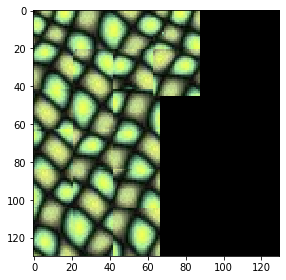

X 63
Y 42
2 27
3 28
4 29
5 30
6 31
7 32
8 33
9 34
26 51
27 28
27 52
39 64
40 65
41 66
42 67
43 68
44 69
45 70
46 71
50 75
60 85
61 86
62 87
63 88
64 89
65 90
66 67
66 91
72 97
73 98
74 99
75 100
left {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75}
Right {27, 28, 29, 30, 31, 32, 33, 34, 52, 53, 54, 55, 56, 57, 58, 59, 77, 78, 79, 80, 81, 82, 83, 84}
MAPPING 1
MAPPING 26
MAPPING 51
MAPPING 76
MAPPING 2
MAPPING 27
MAPPING 52
MAPPING 77
MAPPING 3
MAPPING 28
MAPPING 53
MAPPING 78
MAPPING 4
MAPPING 29
MAPPING 54
MAPPING 79
MAPPING 5
MAPPING 30
MAPPING 55
MAPPING 80
MAPPING 6
MAPPING 31
MAPPING 56
MAPPING 81
MAPPING 7
MAPPING 32
MAPPING 57
MAPPING 82
MAPPING 8
MAPPING 33
MAPPING 58
MAPPING 83
MAPPING 9
MAPPING 34
MAPPING 59
MAPPING 84
MAPPING 10
MAPPING

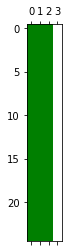

Patch Up [[[0.38823529 0.42745098 0.32156863]
  [0.12941176 0.20392157 0.11764706]
  [0.03137255 0.16470588 0.05882353]
  [0.28627451 0.45882353 0.31764706]
  [0.49803922 0.69411765 0.48627451]
  [0.66666667 0.86666667 0.60392157]
  [0.7372549  0.9254902  0.59607843]
  [0.75686275 0.9372549  0.54901961]
  [0.76862745 0.95294118 0.51372549]
  [0.71372549 0.91764706 0.48627451]
  [0.72156863 0.95686275 0.61176471]
  [0.63921569 0.87058824 0.61176471]
  [0.55294118 0.72941176 0.56862745]
  [0.3254902  0.45490196 0.37254902]
  [0.10588235 0.19607843 0.16470588]
  [0.12156863 0.18039216 0.16862745]
  [0.07058824 0.09803922 0.07058824]
  [0.08235294 0.09411765 0.06666667]
  [0.0627451  0.08235294 0.05490196]
  [0.03921569 0.08235294 0.05098039]
  [0.10588235 0.18431373 0.14117647]
  [0.28235294 0.41176471 0.30588235]
  [0.50980392 0.68627451 0.47058824]
  [0.69411765 0.90588235 0.56078431]
  [0.76078431 0.99215686 0.49019608]]

 [[0.14117647 0.19607843 0.09411765]
  [0.03529412 0.14117647 0.

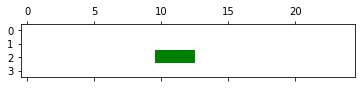

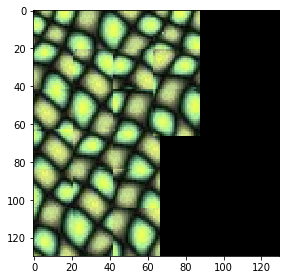

X 63
Y 63
1 26
2 27
3 28
4 29
5 30
6 31
7 32
8 33
9 34
10 35
11 36
12 37
13 38
14 39
15 40
16 41
17 42
18 43
19 44
20 45
21 46
22 47
23 48
24 49
75 100
left {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75}
Right {26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}
MAPPING 1
MAPPING 26
MAPPING 51
MAPPING 76
MAPPING 2
MAPPING 27
MAPPING 52
MAPPING 77
MAPPING 3
MAPPING 28
MAPPING 53
MAPPING 78
MAPPING 4
MAPPING 29
MAPPING 54
MAPPING 79
MAPPING 5
MAPPING 30
MAPPING 55
MAPPING 80
MAPPING 6
MAPPING 31
MAPPING 56
MAPPING 8

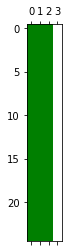

Patch Up [[[0.08627451 0.18039216 0.11764706]
  [0.15294118 0.28235294 0.2       ]
  [0.3254902  0.50196078 0.38039216]
  [0.53333333 0.7372549  0.55686275]
  [0.62352941 0.82745098 0.57647059]
  [0.6745098  0.89803922 0.58823529]
  [0.70196078 0.95294118 0.61176471]
  [0.69019608 0.95686275 0.62352941]
  [0.67843137 0.93333333 0.66666667]
  [0.55686275 0.78431373 0.58823529]
  [0.34509804 0.51372549 0.40392157]
  [0.09803922 0.21960784 0.14901961]
  [0.14117647 0.23529412 0.14901961]
  [0.3254902  0.4        0.2745098 ]
  [0.49019608 0.56078431 0.36470588]
  [0.65098039 0.72941176 0.45882353]
  [0.7254902  0.78431373 0.46666667]
  [0.62745098 0.68235294 0.38823529]
  [0.54117647 0.59607843 0.39607843]
  [0.37647059 0.41960784 0.28627451]
  [0.25098039 0.29019608 0.19215686]
  [0.12941176 0.15686275 0.09411765]
  [0.04705882 0.0745098  0.04313725]
  [0.00392157 0.02745098 0.01176471]
  [0.06666667 0.09019608 0.08235294]]

 [[0.05490196 0.14901961 0.04705882]
  [0.07843137 0.18823529 0.

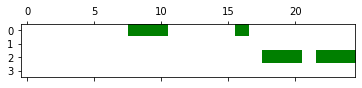

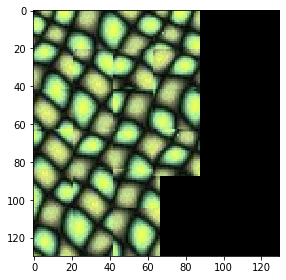

X 63
Y 84
1 26
5 30
6 31
7 32
8 33
9 34
10 35
11 36
12 37
13 38
14 39
15 40
27 52
28 53
29 30
29 54
41 66
44 69
67 92
68 93
69 94
70 95
71 96
72 97
73 98
74 99
75 100
left {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75}
Right {26, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 51, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90}
MAPPING 1
MAPPING 26
MAPPING 51
MAPPING 76
MAPPING 2
MAPPING 27
MAPPING 52
MAPPING 77
MAPPING 3
MAPPING 28
MAPPING 53
MAPPING 78
MAPPING 4
MAPPING 29
MAPPING 54
MAPPING 79
MAPPING 5
MAPPING 30
MAPPING 55
MAPPING 80
MAPPING 6
MAPPING 31
MAPPING 56
MAPPING 81
MAPPING 7
MAPPING 32
MAPPING 57
MAPPING 82
MAPPING 8
MAPPING 33
MAPPING 58
MAPPING 83
MAPPING 9
MAPPING 34
MAPPING 59
MAPPING 8

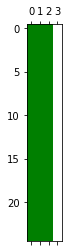

Patch Up [[[0.17254902 0.20392157 0.14509804]
  [0.0745098  0.10196078 0.07058824]
  [0.00392157 0.03137255 0.00392157]
  [0.05098039 0.09019608 0.05882353]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.34117647 0.36078431 0.28235294]
  [0.23921569 0.24705882 0.

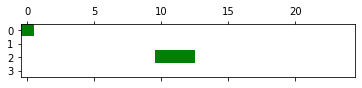

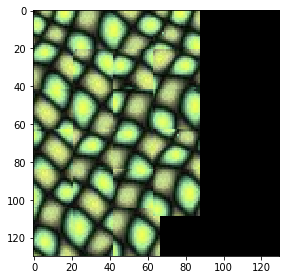

X 63
Y 105
2 27
3 28
16 41
17 42
18 43
19 44
20 45
21 46
22 47
23 48
24 49
25 50
26 51
27 52
28 53
29 54
30 55
37 62
38 63
39 64
40 65
41 42
41 66
56 81
57 82
58 83
59 84
60 85
61 86
62 87
63 88
64 65
64 89
left {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64}
Right {27, 28, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100}
MAPPING 1
MAPPING 26
MAPPING 51
MAPPING 76
MAPPING 2
MAPPING 27
MAPPING 52
MAPPING 77
MAPPING 3
MAPPING 28
MAPPING 53
MAPPING 78
MAPPING 4
MAPPING 29
MAPPING 54
MAPPING 79
MAPPING 5
MAPPING 30
MAPPING 55
MAPPING 80
MAPPING 6
MAPPING 31
MAPPING 56
MAPPING 81
MAPPING 7
MAPPING 32
MAPPING 57
MAPPING 82
MAPPING 8
MAPPING 33
MAPPING 58
MAPPING 83
MAPPING 9
MAPPING 34
MAPPING 59
MAPPING 84
M

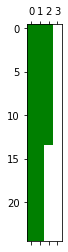

Patch Up [[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0

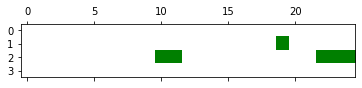

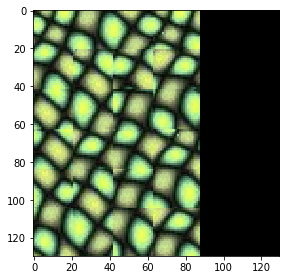

X 84
Y 0
Patch Up [[[0.58823529 0.65098039 0.45882353]
  [0.74509804 0.82745098 0.55686275]
  [0.74117647 0.84313725 0.48627451]
  [0.8        0.90588235 0.48627451]
  [0.86666667 0.96470588 0.50588235]
  [0.82352941 0.91372549 0.45490196]
  [0.82745098 0.91372549 0.49019608]
  [0.78823529 0.85490196 0.48627451]
  [0.74117647 0.79607843 0.48627451]
  [0.63921569 0.70196078 0.45490196]
  [0.37254902 0.45882353 0.27843137]
  [0.15294118 0.23137255 0.12156863]
  [0.0627451  0.12941176 0.05882353]
  [0.06666667 0.12941176 0.09019608]
  [0.09411765 0.15294118 0.13333333]
  [0.04313725 0.09411765 0.06666667]
  [0.03921569 0.07058824 0.01960784]
  [0.11372549 0.14901961 0.06666667]
  [0.25882353 0.31764706 0.18823529]
  [0.43921569 0.52156863 0.35294118]
  [0.59215686 0.68627451 0.49019608]
  [0.74117647 0.82745098 0.58431373]
  [0.78039216 0.87058824 0.56470588]
  [0.78039216 0.88235294 0.53333333]
  [0.76862745 0.87058824 0.52156863]]

 [[0.56470588 0.62745098 0.43529412]
  [0.72156863 0.81

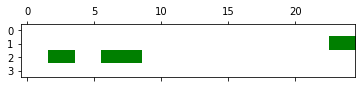

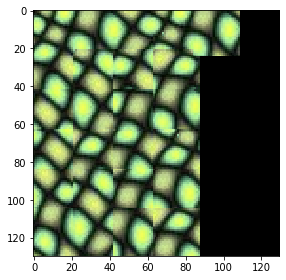

X 84
Y 21
5 30
6 31
8 33
9 34
10 35
11 36
12 37
15 40
16 41
17 42
18 43
19 44
20 45
21 46
22 47
26 51
30 55
31 56
33 58
38 63
39 64
40 41
40 65
48 73
52 77
53 78
54 79
55 80
56 81
57 82
58 83
59 84
60 85
61 86
62 87
63 64
63 88
74 99
75 100
left {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75}
Right {30, 31, 33, 34, 35, 36, 37, 40, 41, 42, 43, 44, 45, 46, 47, 55, 56, 58, 59, 60, 61, 62, 65, 66, 67, 68, 69, 70, 71, 72, 80, 81, 83, 84, 85, 86, 87, 90, 91, 92, 93, 94, 95, 96, 97}
MAPPING 1
MAPPING 26
MAPPING 51
MAPPING 76
MAPPING 2
MAPPING 27
MAPPING 52
MAPPING 77
MAPPING 3
MAPPING 28
MAPPING 53
MAPPING 78
MAPPING 4
MAPPING 29
MAPPING 54
MAPPING 79
MAPPING 5
MAPPING 30
MAPPING 55
MAPPING 80
MAPPING 6
MAPPING 31
MAPPING 56
MAPPING 81
MAPPING 7
MAPPING

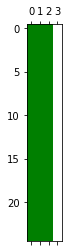

Patch Up [[[0.74117647 0.82745098 0.58431373]
  [0.78039216 0.87058824 0.56470588]
  [0.78039216 0.88235294 0.53333333]
  [0.76862745 0.87058824 0.52156863]
  [0.73333333 0.83921569 0.52156863]
  [0.70196078 0.78431373 0.55294118]
  [0.5254902  0.58823529 0.43529412]
  [0.38823529 0.42352941 0.34117647]
  [0.24313725 0.28627451 0.22352941]
  [0.09019608 0.14509804 0.07843137]
  [0.05882353 0.13333333 0.05490196]
  [0.10980392 0.20392157 0.10980392]
  [0.16470588 0.2745098  0.18431373]
  [0.21568627 0.32156863 0.24705882]
  [0.20392157 0.31764706 0.23921569]
  [0.13333333 0.26666667 0.16078431]
  [0.0627451  0.19215686 0.07843137]
  [0.03137255 0.13333333 0.02745098]
  [0.05882353 0.14901961 0.04705882]
  [0.09411765 0.16470588 0.07843137]
  [0.22745098 0.27843137 0.20784314]
  [0.78431373 0.85882353 0.50588235]
  [0.81176471 0.85098039 0.50980392]
  [0.82745098 0.85490196 0.54117647]
  [0.74117647 0.78431373 0.51764706]]

 [[0.76078431 0.84705882 0.59607843]
  [0.76862745 0.84313725 0.

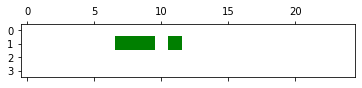

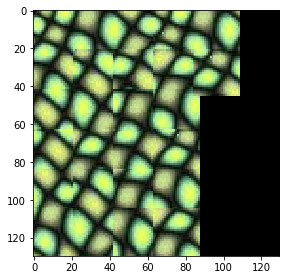

X 84
Y 42
1 26
2 27
3 28
4 29
5 30
6 31
7 32
8 33
9 34
10 35
11 36
12 37
18 43
19 44
20 45
21 46
22 47
23 48
24 49
41 66
42 67
43 44
43 68
63 88
64 89
65 66
65 90
75 100
left {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75}
Right {26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 93, 94, 95, 96, 97, 98, 99}
MAPPING 1
MAPPING 26
MAPPING 51
MAPPING 76
MAPPING 2
MAPPING 27
MAPPING 52
MAPPING 77
MAPPING 3
MAPPING 28
MAPPING 53
MAPPING 78
MAPPING 4
MAPPING 29
MAPPING 54
MAPPING 79
MAPPING 5
MAPPING 30
MAPPING 55
MAPPING 80
MAPPING 6
MAPPING 31
MAPPING 56
MAPPING 81
MAPPING 7
MAPPING 32
MAPPING 57
MAPPING 

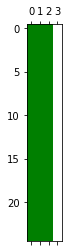

Patch Up [[[0.78431373 0.85882353 0.50588235]
  [0.81176471 0.85098039 0.50980392]
  [0.82745098 0.85490196 0.54117647]
  [0.74117647 0.78431373 0.51764706]
  [0.67843137 0.72941176 0.52156863]
  [0.43137255 0.47058824 0.33333333]
  [0.24705882 0.29803922 0.18823529]
  [0.09803922 0.16862745 0.06666667]
  [0.18039216 0.30588235 0.16078431]
  [0.37254902 0.56470588 0.34901961]
  [0.6745098  0.90196078 0.60392157]
  [0.72941176 0.95686275 0.56470588]
  [0.78039216 0.98039216 0.51372549]
  [0.86666667 1.         0.4745098 ]
  [0.89411765 1.         0.41176471]
  [0.91764706 1.         0.36470588]
  [0.8627451  1.         0.38823529]
  [0.76078431 0.98823529 0.50588235]
  [0.68235294 0.95294118 0.58823529]
  [0.65882353 0.90196078 0.65490196]
  [0.45882353 0.65882353 0.49803922]
  [0.17254902 0.20392157 0.14509804]
  [0.0627451  0.0627451  0.02352941]
  [0.18039216 0.18431373 0.12156863]
  [0.31764706 0.34901961 0.25490196]]

 [[0.76078431 0.82352941 0.57647059]
  [0.67843137 0.71372549 0.

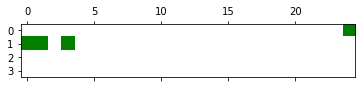

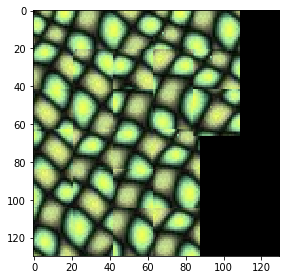

X 84
Y 63
4 29
5 30
6 31
7 32
8 33
9 34
26 51
27 52
28 53
29 30
29 54
37 62
38 63
39 64
40 65
41 66
42 67
43 68
44 69
49 74
60 85
61 62
61 86
70 95
71 96
72 97
73 98
74 99
75 100
left {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75}
Right {32, 33, 34, 79, 80, 81, 82, 83, 84, 54, 55, 56, 57, 58, 59, 29, 30, 31}
MAPPING 1
MAPPING 26
MAPPING 51
MAPPING 76
MAPPING 2
MAPPING 27
MAPPING 52
MAPPING 77
MAPPING 3
MAPPING 28
MAPPING 53
MAPPING 78
MAPPING 4
MAPPING 29
MAPPING 54
MAPPING 79
MAPPING 5
MAPPING 30
MAPPING 55
MAPPING 80
MAPPING 6
MAPPING 31
MAPPING 56
MAPPING 81
MAPPING 7
MAPPING 32
MAPPING 57
MAPPING 82
MAPPING 8
MAPPING 33
MAPPING 58
MAPPING 83
MAPPING 9
MAPPING 34
MAPPING 59
MAPPING 84
MAPPING 10
MAPPING 35
MAPPING 60
MAPPING 85
MAPPING 11
MAP

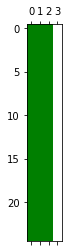

Patch Up [[[0.17254902 0.20392157 0.14509804]
  [0.0627451  0.0627451  0.02352941]
  [0.18039216 0.18431373 0.12156863]
  [0.31764706 0.34901961 0.25490196]
  [0.34901961 0.39215686 0.2745098 ]
  [0.36470588 0.42352941 0.29411765]
  [0.38431373 0.43529412 0.31764706]
  [0.37254902 0.40392157 0.30980392]
  [0.37647059 0.40784314 0.31764706]
  [0.29019608 0.31764706 0.24705882]
  [0.23529412 0.27843137 0.21176471]
  [0.21960784 0.27843137 0.20392157]
  [0.1372549  0.20784314 0.12156863]
  [0.09019608 0.14117647 0.0627451 ]
  [0.09803922 0.12941176 0.07058824]
  [0.05490196 0.05098039 0.03529412]
  [0.08235294 0.06666667 0.0627451 ]
  [0.10196078 0.09803922 0.07843137]
  [0.21960784 0.21960784 0.17254902]
  [0.30980392 0.31372549 0.24313725]
  [0.41568627 0.44313725 0.32156863]
  [0.56078431 0.61176471 0.43137255]
  [0.69411765 0.77647059 0.51372549]
  [0.73333333 0.83921569 0.4745098 ]
  [0.79607843 0.90588235 0.4627451 ]]

 [[0.04313725 0.04705882 0.02745098]
  [0.18039216 0.18823529 0.

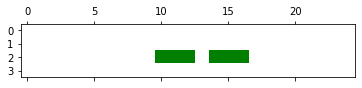

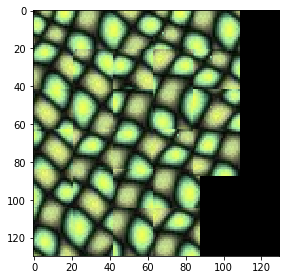

X 84
Y 84
2 27
3 28
11 36
12 37
13 38
14 39
15 40
16 41
17 42
18 43
19 44
20 45
21 46
24 49
26 51
27 52
28 53
29 54
35 60
36 61
37 38
37 62
55 80
56 81
57 82
58 83
59 84
60 85
61 62
61 86
72 97
73 98
74 99
75 100
left {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75}
Right {27, 28, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 49, 52, 53, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 77, 78, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 99}
MAPPING 1
MAPPING 26
MAPPING 51
MAPPING 76
MAPPING 2
MAPPING 27
MAPPING 52
MAPPING 77
MAPPING 3
MAPPING 28
MAPPING 53
MAPPING 78
MAPPING 4
MAPPING 29
MAPPING 54
MAPPING 79
MAPPING 5
MAPPING 30
MAPPING 55
MAPPING 80
MAPPING 6
MAPPING 31
MAPPING 56
MAPPING 81
MAPPING 7
MAPPING 32
MAPPING 57
MAPPING 82
MAPPING 8
MAPP

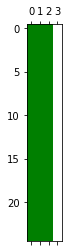

Patch Up [[[0.83529412 0.90196078 0.54117647]
  [0.84705882 0.91372549 0.5372549 ]
  [0.82352941 0.89411765 0.50588235]
  [0.76470588 0.83921569 0.47843137]
  [0.8        0.88627451 0.56078431]
  [0.74117647 0.81960784 0.54901961]
  [0.61960784 0.68627451 0.48235294]
  [0.49411765 0.54901961 0.40784314]
  [0.31372549 0.36078431 0.26666667]
  [0.10196078 0.16078431 0.07843137]
  [0.05490196 0.15294118 0.06666667]
  [0.19607843 0.34901961 0.23529412]
  [0.41568627 0.63137255 0.47843137]
  [0.51372549 0.76862745 0.55686275]
  [0.6627451  0.9372549  0.65098039]
  [0.65490196 0.9254902  0.6       ]
  [0.65098039 0.90196078 0.56470588]
  [0.70196078 0.94509804 0.61960784]
  [0.66666667 0.89411765 0.59607843]
  [0.54117647 0.76078431 0.51372549]
  [0.42352941 0.61176471 0.44705882]
  [0.24313725 0.39607843 0.29019608]
  [0.11764706 0.20392157 0.15686275]
  [0.03921569 0.08627451 0.07058824]
  [0.03529412 0.05490196 0.02745098]]

 [[0.7254902  0.78823529 0.50980392]
  [0.71764706 0.78039216 0.

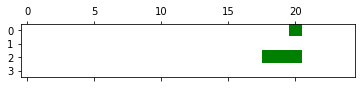

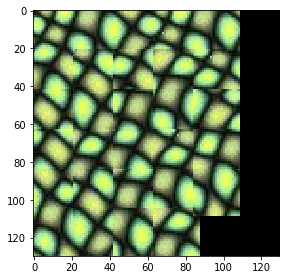

X 84
Y 105
1 26
2 27
10 35
11 36
12 37
16 41
17 42
18 43
19 44
25 50
33 58
34 59
35 36
35 60
41 66
42 43
42 67
50 75
53 78
54 79
55 80
56 81
57 82
58 59
58 83
63 88
64 89
65 90
66 67
66 91
70 95
71 96
72 97
73 98
74 99
75 100
left {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75}
Right {26, 27, 35, 36, 37, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 66, 67, 68, 69, 75, 76, 77, 85, 86, 87, 91, 92, 93, 94, 100}
MAPPING 1
MAPPING 26
MAPPING 51
MAPPING 76
MAPPING 2
MAPPING 27
MAPPING 52
MAPPING 77
MAPPING 3
MAPPING 28
MAPPING 53
MAPPING 78
MAPPING 4
MAPPING 29
MAPPING 54
MAPPING 79
MAPPING 5
MAPPING 30
MAPPING 55
MAPPING 80
MAPPING 6
MAPPING 31
MAPPING 56
MAPPING 81
MAPPING 7
MAPPING 32
MAPPING 57
MAPPING 82
MAPPING 8
MAPPING 33
MAPPING 58
MAPPING 83
MAPPI

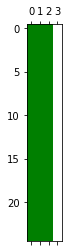

Patch Up [[[0.12941176 0.23921569 0.15294118]
  [0.0627451  0.14509804 0.08627451]
  [0.18039216 0.24705882 0.17254902]
  [0.28627451 0.34901961 0.24705882]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.4        0.54509804 0.41176471]
  [0.09803922 0.22352941 0.

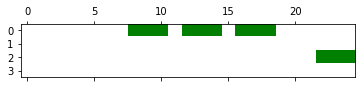

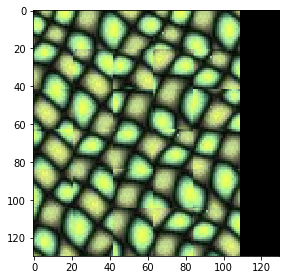

X 105
Y 0
Patch Up [[[0.75686275 0.95294118 0.60392157]
  [0.54117647 0.74117647 0.52156863]
  [0.25490196 0.42745098 0.29019608]
  [0.03921569 0.14117647 0.03529412]
  [0.2        0.2745098  0.15686275]
  [0.40784314 0.49019608 0.3372549 ]
  [0.57647059 0.66666667 0.4627451 ]
  [0.72156863 0.81960784 0.56470588]
  [0.73333333 0.83529412 0.54901961]
  [0.7372549  0.84313725 0.54117647]
  [0.74901961 0.84313725 0.54509804]
  [0.7254902  0.81176471 0.52941176]
  [0.7254902  0.80392157 0.55686275]
  [0.59607843 0.65882353 0.46666667]
  [0.48235294 0.52941176 0.38039216]
  [0.37254902 0.41176471 0.30588235]
  [0.20784314 0.25490196 0.17647059]
  [0.0627451  0.10588235 0.05098039]
  [0.04705882 0.10980392 0.05882353]
  [0.10980392 0.21568627 0.15686275]
  [0.19607843 0.33333333 0.25490196]
  [0.07843137 0.14509804 0.10588235]
  [0.09019608 0.16862745 0.12156863]
  [0.01176471 0.09803922 0.04705882]
  [0.06666667 0.15686275 0.09411765]]

 [[0.69411765 0.87843137 0.56078431]
  [0.49019608 0.6

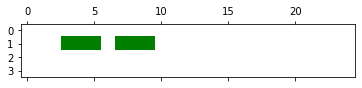

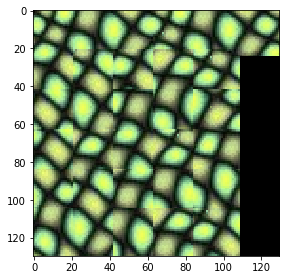

X 105
Y 21
1 26
3 28
4 29
13 38
14 39
15 40
16 41
17 42
18 43
19 44
21 46
22 47
23 48
24 49
25 50
28 53
29 54
38 39
38 63
47 72
48 73
49 74
50 75
52 77
53 78
54 79
55 80
56 81
57 82
58 83
59 84
60 85
61 86
62 87
63 64
63 88
70 95
71 96
72 97
73 98
74 99
75 100
left {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75}
Right {26, 28, 29, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 53, 54, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 78, 79, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100}
MAPPING 1
MAPPING 26
MAPPING 51
MAPPING 76
MAPPING 2
MAPPING 27
MAPPING 52
MAPPING 77
MAPPING 3
MAPPING 28
MAPPING 53
MAPPING 78
MAPPING 4
MAPPING 29
MAPPING 54
MAPPING 79
MAPPING 5
MAPPING 30
MAPPING 55
MAPPING 80
MAPPING 6
MAPPING 31
MAPPING 56
MAPPING

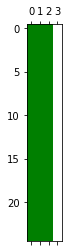

Patch Up [[[0.07843137 0.14509804 0.10588235]
  [0.09019608 0.16862745 0.12156863]
  [0.01176471 0.09803922 0.04705882]
  [0.06666667 0.15686275 0.09411765]
  [0.0627451  0.14509804 0.07058824]
  [0.18431373 0.25490196 0.16078431]
  [0.34509804 0.40784314 0.26666667]
  [0.55294118 0.60392157 0.39607843]
  [0.63137255 0.68235294 0.41176471]
  [0.85098039 0.89803922 0.56862745]
  [0.83529412 0.89019608 0.50980392]
  [0.81568627 0.8745098  0.47843137]
  [0.85098039 0.91764706 0.50980392]
  [0.80784314 0.87843137 0.48627451]
  [0.79215686 0.85490196 0.50980392]
  [0.72941176 0.78039216 0.50980392]
  [0.55294118 0.59215686 0.39607843]
  [0.36862745 0.40784314 0.2745098 ]
  [0.16470588 0.2        0.1254902 ]
  [0.0627451  0.10196078 0.07058824]
  [0.04313725 0.07843137 0.06666667]
  [0.17647059 0.22352941 0.1372549 ]
  [0.14509804 0.2        0.10980392]
  [0.21176471 0.2627451  0.18431373]
  [0.17254902 0.20392157 0.14509804]]

 [[0.19607843 0.33333333 0.25490196]
  [0.25882353 0.40784314 0.

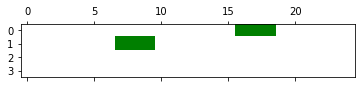

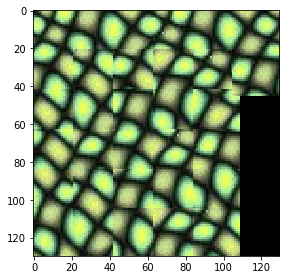

X 105
Y 42
5 30
6 31
7 32
8 33
9 34
10 35
11 36
12 37
13 38
14 39
15 40
16 41
17 42
18 43
19 44
20 45
21 46
25 50
28 53
29 30
29 54
47 72
51 76
52 77
53 54
53 78
73 98
74 99
75 100
left {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75}
Right {30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 50, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 75, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 100}
MAPPING 1
MAPPING 26
MAPPING 51
MAPPING 76
MAPPING 2
MAPPING 27
MAPPING 52
MAPPING 77
MAPPING 3
MAPPING 28
MAPPING 53
MAPPING 78
MAPPING 4
MAPPING 29
MAPPING 54
MAPPING 79
MAPPING 5
MAPPING 30
MAPPING 55
MAPPING 80
MAPPING 6
MAPPING 31
MAPPING 56
MAPPING 81
MAPPING 7
MAPPING 32
MAPPING 57
MAPPING 

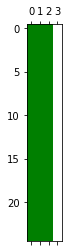

Patch Up [[[0.17647059 0.22352941 0.1372549 ]
  [0.14509804 0.2        0.10980392]
  [0.21176471 0.2627451  0.18431373]
  [0.17254902 0.20392157 0.14509804]
  [0.2        0.22352941 0.17647059]
  [0.1254902  0.16470588 0.12156863]
  [0.10196078 0.15686275 0.10588235]
  [0.07058824 0.15294118 0.08627451]
  [0.00392157 0.08627451 0.01176471]
  [0.00784314 0.08235294 0.00392157]
  [0.03529412 0.09019608 0.02352941]
  [0.0745098  0.09803922 0.08235294]
  [0.03921569 0.05490196 0.05098039]
  [0.10980392 0.12156863 0.09411765]
  [0.19607843 0.20392157 0.15294118]
  [0.34509804 0.35686275 0.28235294]
  [0.37647059 0.40392157 0.2745098 ]
  [0.56470588 0.62745098 0.43529412]
  [0.72156863 0.81176471 0.5372549 ]
  [0.79215686 0.90588235 0.54117647]
  [0.84313725 0.95294118 0.50980392]
  [0.82745098 0.9254902  0.51764706]
  [0.80784314 0.90196078 0.4627451 ]
  [0.81568627 0.88235294 0.46666667]
  [0.79607843 0.85098039 0.47058824]]

 [[0.34901961 0.39215686 0.2745098 ]
  [0.36470588 0.42352941 0.

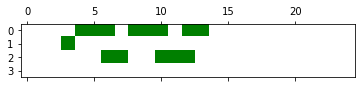

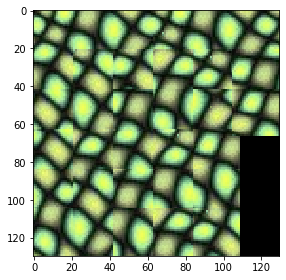

X 105
Y 63
2 27
3 28
4 29
5 30
6 31
7 32
8 33
9 34
18 43
19 44
20 45
21 46
22 47
23 48
24 49
25 50
26 51
27 52
28 53
29 54
30 55
31 56
32 57
42 67
43 44
43 68
58 83
59 84
60 85
61 86
62 87
63 88
64 89
65 90
66 91
67 68
67 92
left {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67}
Right {27, 28, 29, 30, 31, 32, 33, 34, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 93, 94, 95, 96, 97, 98, 99, 100}
MAPPING 1
MAPPING 26
MAPPING 51
MAPPING 76
MAPPING 2
MAPPING 27
MAPPING 52
MAPPING 77
MAPPING 3
MAPPING 28
MAPPING 53
MAPPING 78
MAPPING 4
MAPPING 29
MAPPING 54
MAPPING 79
MAPPING 5
MAPPING 30
MAPPING 55
MAPPING 80
MAPPING 6
MAPPING 31
MAPPING 56
MAPPING 81
MAPPING 7
MAPPING 32
MAPPING 57
MAPPING 82
MAPPING 8

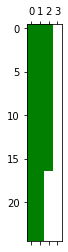

Patch Up [[[0.82745098 0.9254902  0.51764706]
  [0.80784314 0.90196078 0.4627451 ]
  [0.81568627 0.88235294 0.46666667]
  [0.79607843 0.85098039 0.47058824]
  [0.79607843 0.85882353 0.50980392]
  [0.74901961 0.81568627 0.50980392]
  [0.7254902  0.78039216 0.5372549 ]
  [0.53333333 0.58039216 0.39215686]
  [0.39607843 0.41568627 0.29019608]
  [0.20784314 0.21960784 0.1372549 ]
  [0.15294118 0.18039216 0.11764706]
  [0.07058824 0.11764706 0.0627451 ]
  [0.03137255 0.11372549 0.04705882]
  [0.05882353 0.14901961 0.07058824]
  [0.08627451 0.17254902 0.09019608]
  [0.16862745 0.23137255 0.12941176]
  [0.27058824 0.30588235 0.19215686]
  [0.36470588 0.40392157 0.26666667]
  [0.4745098  0.5372549  0.39215686]
  [0.56862745 0.65098039 0.49019608]
  [0.6        0.67058824 0.50588235]
  [0.57254902 0.77254902 0.54117647]
  [0.60392157 0.81176471 0.54509804]
  [0.68627451 0.89411765 0.61960784]
  [0.57254902 0.76862745 0.52941176]]

 [[0.85882353 0.96078431 0.47058824]
  [0.87843137 0.98431373 0.

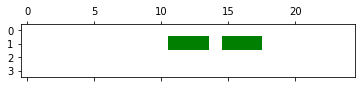

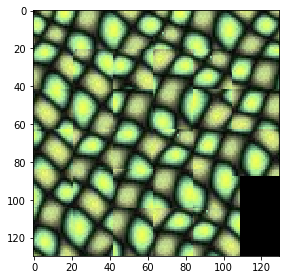

X 105
Y 84
1 26
2 27
3 28
6 31
7 32
8 33
9 34
10 35
11 36
16 41
17 42
18 43
20 45
21 46
22 47
23 48
24 49
25 50
30 55
31 56
32 57
33 58
34 35
34 59
41 42
41 66
44 69
45 70
46 47
46 71
54 79
55 80
56 81
57 58
57 82
62 87
63 88
64 89
65 90
66 67
66 91
left {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66}
Right {26, 27, 28, 31, 32, 33, 34, 35, 36, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 56, 57, 58, 59, 60, 61, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 81, 82, 83, 84, 85, 86, 91, 92, 93, 95, 96, 97, 98, 99, 100}
MAPPING 1
MAPPING 26
MAPPING 51
MAPPING 76
MAPPING 2
MAPPING 27
MAPPING 52
MAPPING 77
MAPPING 3
MAPPING 28
MAPPING 53
MAPPING 78
MAPPING 4
MAPPING 29
MAPPING 54
MAPPING 79
MAPPING 5
MAPPING 30
MAPPING 55
MAPPING 80
MAPPING 6
MAPPING 31
MAPPING 56
MAPPING 81
MAPPING

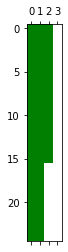

Patch Up [[[0.57254902 0.77254902 0.54117647]
  [0.60392157 0.81176471 0.54509804]
  [0.68627451 0.89411765 0.61960784]
  [0.57254902 0.76862745 0.52941176]
  [0.40784314 0.56862745 0.39607843]
  [0.21960784 0.3372549  0.22745098]
  [0.11764706 0.16470588 0.10980392]
  [0.21176471 0.24705882 0.18039216]
  [0.49019608 0.5372549  0.39607843]
  [0.6627451  0.7372549  0.52156863]
  [0.7254902  0.81568627 0.54901961]
  [0.70980392 0.81960784 0.51764706]
  [0.76470588 0.8745098  0.57254902]
  [0.70196078 0.8        0.53333333]
  [0.62745098 0.69803922 0.50196078]
  [0.42745098 0.47058824 0.34509804]
  [0.30980392 0.3372549  0.26666667]
  [0.18431373 0.20784314 0.16078431]
  [0.0627451  0.11372549 0.04705882]
  [0.         0.05882353 0.        ]
  [0.00784314 0.08235294 0.        ]
  [0.03921569 0.11372549 0.02745098]
  [0.05882353 0.1254902  0.05490196]
  [0.02745098 0.10196078 0.02745098]
  [0.02352941 0.12156863 0.03529412]]

 [[0.27843137 0.45490196 0.30196078]
  [0.38823529 0.57254902 0.

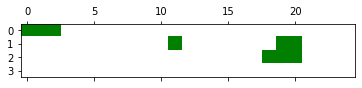

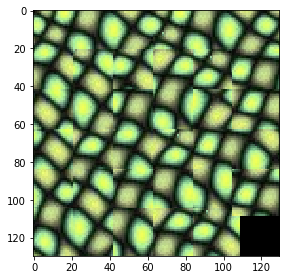

X 105
Y 105
2 27
3 28
4 29
5 30
6 31
7 32
8 33
9 34
10 35
11 36
12 37
13 38
14 39
15 40
16 41
17 42
18 43
19 44
20 45
21 46
22 47
23 48
24 49
25 50
27 52
28 53
29 54
30 55
31 56
32 33
32 57
51 76
52 77
53 78
54 79
55 56
55 80
left {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55}
Right {27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100}
MAPPING 1
MAPPING 26
MAPPING 51
MAPPING 76
MAPPING 2
MAPPING 27
MAPPING 52
MAPPING 77
MAPPING 3
MAPPING 28
MAPPING 53
MAPPING 78
MAPPING 4
MAPPING 29
MAPPING 54
MAPPING 79
MAPPING 5
MAPPING 30
MAPPING 55
MAPPING 80
MAPPING 6
MAPPING 31
MAPPING 56
MAPPING 81
MAP

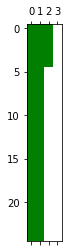

Patch Up [[[0.67058824 0.7254902  0.49411765]
  [0.6745098  0.72941176 0.49803922]
  [0.66666667 0.72156863 0.49019608]
  [0.6745098  0.71764706 0.49803922]
  [0.58431373 0.62352941 0.42745098]
  [0.49019608 0.52156863 0.36078431]
  [0.38823529 0.42745098 0.29411765]
  [0.25490196 0.28627451 0.19607843]
  [0.18823529 0.22352941 0.15686275]
  [0.14509804 0.17254902 0.14117647]
  [0.09019608 0.10980392 0.09411765]
  [0.07058824 0.0745098  0.08235294]
  [0.05098039 0.05882353 0.05490196]
  [0.09019608 0.11764706 0.08627451]
  [0.11372549 0.15686275 0.09411765]
  [0.14509804 0.19215686 0.11372549]
  [0.21176471 0.26666667 0.16470588]
  [0.28235294 0.33333333 0.21568627]
  [0.34117647 0.38431373 0.25098039]
  [0.41568627 0.44313725 0.31372549]
  [0.41176471 0.42352941 0.30980392]
  [0.39215686 0.39215686 0.29803922]
  [0.36862745 0.36470588 0.28627451]
  [0.28627451 0.30196078 0.23529412]
  [0.16078431 0.21176471 0.14117647]]

 [[0.82352941 0.89411765 0.56470588]
  [0.80392157 0.88235294 0.

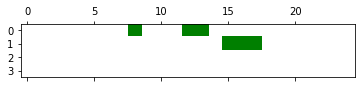

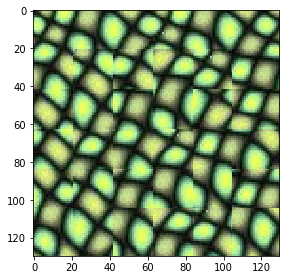

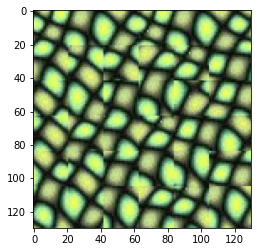

In [10]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('/content/quilt.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img = image_quilt(img, 25, (6, 6), "cut")
plt.imshow(img)